In [58]:
from sklearn.datasets import fetch_lfw_people
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

1. feladat

In [32]:
lfw = fetch_lfw_people(min_faces_per_person=5)

In [34]:
kep = lfw.images
cim = lfw.target
nev = lfw.target_names

In [38]:
np.random.seed(42)
selected = np.random.choice(len(kep), 200, replace=False)
kepek = kep[selected]
cimkek = cim[selected]
nevek = [nev[label] for label in cimkek]

In [10]:
np.save("selected_images.npy", kepek)  
np.save("selected_labels.npy", cimkek)  

Jelenítsünk meg egy képet!

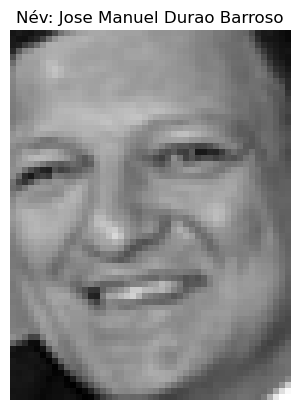

In [14]:
idx = 0 
plt.imshow(kepek[idx], cmap='gray')  
plt.title(f"Név: {nev[cimkek[idx]]}")  
plt.axis('off') 
plt.show()

2. feladat

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mtcnn = MTCNN(keep_all=True, device=device)
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)
beagyazo_vektorok = []

  0%|          | 0.00/107M [00:00<?, ?B/s]

In [72]:
def generate_embeddings(images):
    embeddings = []
    with torch.no_grad():
        for img in images:
            if isinstance(img, np.ndarray):
                img = Image.fromarray(img)
            if img.mode != 'RGB':
                img = img.convert('RGB')
            img = img.resize((160, 160))
            img_array = np.array(img)
            img_tensor = torch.tensor(img_array).permute(2, 0, 1).unsqueeze(0).float().to(device)
            embedding = resnet(img_tensor).squeeze().cpu().numpy()
            embeddings.append(embedding)
    return np.array(embeddings)

train_embeddings = generate_embeddings(train_images)
test_embeddings = generate_embeddings(test_images)

In [22]:
beagyazo_vektorok = np.array(beagyazo_vektorok)
np.save("embedding_vectors.npy", beagyazo_vektorok)
np.save("labels.npy", cimkek[:len(beagyazo_vektorok)])
print("Egy minta beágyazóvektor:", beagyazo_vektorok[0])

Egy minta beágyazóvektor: [ 2.29062457e-02  3.74327414e-02 -5.99165633e-02 -7.98912346e-02
  8.77130218e-03  1.35963252e-02 -3.47016975e-02  6.46059215e-02
 -6.99659716e-03 -3.21159102e-02  5.77187166e-03  4.19187620e-02
  5.18032387e-02  4.73418459e-02  4.76186210e-03  5.04780412e-02
 -6.00540787e-02 -4.55298834e-02 -2.69850018e-03 -3.76649164e-02
  4.87130620e-02 -8.86223987e-02  3.07366922e-02  1.70936380e-02
  6.14319891e-02 -3.49642672e-02  5.35666049e-02 -5.73686883e-02
 -1.39876932e-03 -3.45288813e-02  2.61629894e-02 -7.66410753e-02
 -1.47533100e-02  2.66549010e-02 -1.30901737e-02  7.08439127e-02
  6.94356263e-02  2.83447951e-02  9.78992693e-03 -3.54220644e-02
 -2.17330158e-02 -2.18373840e-03 -6.31548613e-02  2.70181522e-03
 -8.20486806e-03  1.11124953e-02 -8.92381966e-02  2.56874785e-02
 -3.99996825e-02  9.58685018e-03 -7.05318078e-02 -5.95860071e-02
 -7.16909394e-02 -5.72758391e-02 -8.00196230e-02  3.44526954e-02
  3.64772193e-02 -8.48364532e-02  1.33581590e-02 -9.57174692e-03

3. feladat

In [78]:
egyedi = np.unique(cimkek)
train_egyed = []
test_egyed = []

for label in egyedi:
    label_indices = np.where(cimkek == label)[0]
    
    if len(label_indices) > 1:
        train_idx, test_idx = train_test_split(
            label_indices,
            test_size=50 / 200,  
            random_state=42
        )
        train_egyed.extend(train_idx)
        test_egyed.extend(test_idx)
    else:
        print(f"Label {label} kihagyva, mert csak {len(label_indices)} minta van.")

train_images = kepek[train_egyed]
test_images = kepek[test_egyed]
train_labels = cimkek[train_egyed]
test_labels = cimkek[test_egyed]

Label 0 kihagyva, mert csak 1 minta van.
Label 2 kihagyva, mert csak 1 minta van.
Label 4 kihagyva, mert csak 1 minta van.
Label 9 kihagyva, mert csak 1 minta van.
Label 14 kihagyva, mert csak 1 minta van.
Label 18 kihagyva, mert csak 1 minta van.
Label 25 kihagyva, mert csak 1 minta van.
Label 26 kihagyva, mert csak 1 minta van.
Label 31 kihagyva, mert csak 1 minta van.
Label 38 kihagyva, mert csak 1 minta van.
Label 42 kihagyva, mert csak 1 minta van.
Label 50 kihagyva, mert csak 1 minta van.
Label 51 kihagyva, mert csak 1 minta van.
Label 54 kihagyva, mert csak 1 minta van.
Label 63 kihagyva, mert csak 1 minta van.
Label 64 kihagyva, mert csak 1 minta van.
Label 65 kihagyva, mert csak 1 minta van.
Label 68 kihagyva, mert csak 1 minta van.
Label 74 kihagyva, mert csak 1 minta van.
Label 82 kihagyva, mert csak 1 minta van.
Label 84 kihagyva, mert csak 1 minta van.
Label 105 kihagyva, mert csak 1 minta van.
Label 106 kihagyva, mert csak 1 minta van.
Label 108 kihagyva, mert csak 1 mint

4.-5. feladat

In [80]:
correct_predictions = 0

for i, test_vector in enumerate(test_embeddings):
    similarities = cosine_similarity([test_vector], train_embeddings)
    predicted_label = train_labels[np.argmax(similarities)]
    if predicted_label == test_labels[i]:
        correct_predictions += 1

accuracy = correct_predictions / len(test_labels)
print(f"Pontosság: {accuracy:.2%}")

Pontosság: 2.44%
